In [2]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import string

# **On the Art of Building (De re aedificatoria)**
### Leon Battista Alberti
--------------
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/De_Re_Aedificatoria.jpg" width="336" height="510" />

**Book One: Lineaments**
1. Of Designs; their Value and Rules.
2. Of the first Occasion of erecting Edifices; of how many Parts the Art of Building consists, and what is necessary to each of those Parts.
3. Of the Region of the Climate or Air, of the Sun and Winds which affect the Air.
4. Which Region is, and which is not commodi− ous for Building.
5. By what Marks and Characters we are to know the Goodness of the Region.
6. Of some hidden Conveniencies and Inccnveni− encies of the Region which a wise Man ought to enquire into.
7. Of the Seat, or Platform, and of the several Sorts of Lines.
8. Of the Kinds of Platforms, their Forms and Figures, and which are the most serviceable and lasting.
9. Of the Compartition, and of the Origin of Building.
10. Of the Columns and Walls, and some Observa− tions relating to the Columns.
11. Of the great Usefulness of the Coverings both to the Inhabitants and the other Parts of the Building, and that being various in their Natures, they must be made of various Sorts.
12. Of the Apertures in the Building, that is to say, of the Windows and Doors, and of those which do not take up the whole Thickness of the Wall, and their Number and Sizes.
13. Of the Stair−cases, and their different Sorts; of Steps of the Stairs which ought to be in odd Numbers, and how many. Of the Resting−places, of the Tunnels for carrying away the Smoke. Of Pipes and Conduits for carrying off the Water, and of the proper placing of Wells and Sinks.


**Book Two: Materials**


1. Treating of the Materials. That no Man ought to begin a Building hastily, but should first take a good deal of Time to consider, and revolve in his Mind all the Qualities and Requisites of such a Work: And that he should carefully review and examine, with the Advice of proper Judges, the whole Structure in it− self, and the Proportions and Measures of every distinct Part, not only in Draughts or Paintings, but in actual Models of Wood or some other Substance, that when he has finished his Building, he may not repent of his Labour.
2. That we ought to undertake nothing above our Abilities, nor strive against Nature, and that we ought also not only to consider what we can do, but what is fit for us to do, and in what Place it is that we are to build.
3. That having considered the whole Disposition of the Building in all the Parts of the Model, we ought to take the Advice of prudent and understanding Men, and before we begin our Work, it will not only be proper to know how to raise Money for the Expence, but also long before−hand to provide all the Materials for com− pleating such an Undertaking.
4. What Materials are to be provided for the Building, what Workmen to be chose, and in what Sea−
5. Of preserving the Trees after they are cut, what to plaister or anoint them with, of the Remedies against their Infirmities, and of allotting them their pro− per Places in the Building.
6. What Woods are most proper for Buildings, their Nature and Uses, how they are to be employed, and in what Part of the Edifice each Kind is most fit for.
7. Of Trees more summarily and in general.
8. Of Stones in general, when they are to be dug, and when used; which are the softest and which the hardest, and which best and most durable.
9. Some Things worthy memorial, relating to Stones, left us by the Ancients.
10. Of the Origin of the Use of Bricks, in what Season they ought to be made, and in what Shapes, their different Sorts, and the Usefulness of triangular ones; and briefly, of all other Works made of baked Earth.
11. Of the Nature of Lime and Plaister of Paris, their Uses and Kinds, wherein they agree and wherein they differ, and of some Things not unworthy of Memory.
12. Of the three different Kinds of Sands, and of the various Materials used in Building in different Places.
13. Whether the Observation of Times and Sea− sons is of any Use in beginning a Building; what Sea− son is most convenient; as also, with what Auguries or Prayers we ought to set out upon our Work.

**Book Three: Construction**

1. Of the Work. Wherein lies the Business of the Work; the different Parts of the Walls, and what they require. That the Foundation is no Part of the Wall; what Soil makes the best Foundation.
2. That the Foundation chiefly is to be marked out with Lines; and by what Tokens we may know the Goodness of the Ground.
3. That the Nature of Places is various, and therefore we ought not to trust any Place too hastily, till we have first dug Wells or Reservoirs; but that in marshy Places we must make our Foundation with Piles burntat the Ends, and driven in with their Heads downward with light Beetles, and many repeated Blows, till they are driven quite in to the Head.
4. Of the Nature, Forms and Qualities of Stones, and of the Tempering of Mortar.
5. Of the lower Courses or Foundations, accord− ing to the Precepts and Example of the Ancients.
6. That there ought to be Vents left open in thick Walls from the Bottom to the Top, the Difference between the Wall and the Foundation: The principal Parts of the Wall; the three Methods of Wailing; the Materials and Form of the first Course or Layer.
7. Of the Generation of Stones: How they are to be disposed and joined together, as also, which are the strongest and which the weakest.
8. Of the Parts of the Finishing; of the Shells, the Stuffing, and their different Sorts.
9. Of the Girders of Stone, of the Ligament and Fortification of the Cornices, and how to unite several Stones for the Strengthening of the Wall.
10. Of the true Manner of Working the Wall, and of the Agreement there is between Stone and Sand.
11. Of the Way of Working different Materials; of Plaistering, of Cramps, and how to preserve them;the most ancient Instructions of Architects; and some Methods to prevent the Mischiefs of Lightning.
12. Of Coverings of streight Lines; of the Beams and Rafters, and of the uniting the Ribs.
13. Of Coverings, or Roofs of Curve Lines; of Arches, their Difference and Construction, and how to set the Stones in an Arch.
14. Of the several Sorts of Vaults, and wherein they differ; of what Lines they are composed, and the Method of letting them settle.
15. Of the Shell of the Covering, and its Useful− ness; the different Sorts and Shapes of Tiles, and what to make them of.
16. Of Pavements according to the Opinion of Pliny and Vitruvius, and the Works of the Ancients; and of the proper Seasons for beginning, and finishing the several Parts of Building.

**Book Four: Public Works**

**Book Five: Works of Individuals**

**Book Six: Ornament**

**Book Seven: Ornament to Sacred Buildings**

**Book Eight: Ornament to Public Secular Buildings**

**Book Nine: Ornament to Private Buildings**

**Book Ten: Restoration of Buildings**

### Raw text Cleaner


In [36]:
# open raw text
f = open("THE_ARCHITECTURE_OF_LEON_BATISTA_ALBERTI.txt", "r")
content = f.read()

# delimit into 'books' - each book has the title of 'The Architecture of Leone Batista Alberti'
# which makes this step easy
content = content.replace('\n', '')
delim = 'THE ARCHITECTURE OF Leone Batista Alberti.'
strlist = content.split(delim)


# drop the broken up text into a dataframe, all of the following is formatting said dataframe
df = pd.DataFrame(strlist, columns = ['text'])
# first row is empty, drop it. Reset the index to coorespond to book.
df.drop([0],inplace=True)
df=df.reset_index()
df.drop(['index'], axis = 1, inplace=True)


In [38]:
df.head()

,text,chapters,book
0,the preface our ancestors have left us many a...,[the preface our ancestors have left us many ...,0
1,book i chap i of designs their value and ...,"[ book i , i of designs their value and ru...",1
2,book ii chap i treating of the materials ...,"[ book ii , i treating of the materials th...",2
3,book iii chap i of the work wherein lies ...,"[ book iii , i of the work wherein lies th...",3
4,book iv chap i of works of a publick natur...,"[ book iv , i of works of a publick nature ...",4


In [37]:

# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['text'] = df['text'].map(alphanumeric).map(punc_lower)
#chapterizing
df['chapters'] = df['text'].apply(lambda x: x.split('chap '))
df['book']= df.index


In [73]:
ch_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,the preface our ancestors have left us many a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i of designs their value and rules being t...,ii of the first occasion of erecting edifices...,iii of the region of the climate or air of...,iv which region is and which is not commodi...,v by what marks and characters we are to kno...,vi of some more hidden conveniencies and inc...,vii of the seat or platform and of the seve...,viii of the kinds of platforms their forms ...,ix of the compartition and of the origin of...,x of the columns and walls and some observa...,xi of the great usefulness of the coverings ...,xii of the apertures in the building that i...,xiii of the stair cases and their different...,NaN,NaN,NaN,NaN,NaN
2,i treating of the materials that no man oug...,ii that we ought to undertake nothing above ...,xii that having consider d the whole dispos...,vi what materials are to be provided for the...,v of preserving the trees after they are cut...,vi what woods are most proper for building ...,vii of trees more summarily but to speak of...,viii of stones in general when they are to ...,ix some things worthy memorial relating to ...,x of the origin of the use of bricks in wha...,xi of the nature of lime and plaister of par...,xii of the three different kinds of sands a...,xiii whether the observation of times and se...,NaN,NaN,NaN,NaN,NaN
3,i of the work wherein lies the business of ...,ii that the foundation chiefly is to be mark...,iii that the nature of places is various an...,iv of the nature forms and qualities of sto...,v of the lower courses or foundations accor...,vi that there ought to be vents left open in...,vii of the generation of stones how they ar...,viii of the parts of the finishing of the s...,ix of the girders of stone of the ligament ...,x of the true manner of working the wall an...,xi of the way of working different materials...,xii of coverings of strait lines of the bea...,xiii of coverings or roofs of curve lines ...,xiv of the several sorts of vaults and wher...,xv of the shell of the covering and its use...,xvi of pavements according to the opinion of...,NaN,NaN
4,i of works of a publick nature that all bui...,ii of the region place and conveniencies a...,iii of the compass space and bigness of the...,iv of the iv alls battlements towers corn...,v of the proportion fashion and constructio...,vi of bridges both of wood and stone their ...,vii of drains or sewers their different sor...,viii of the proper structure for a haven an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
ch_df = pd.DataFrame()
ch_df = df['chapters'].apply(pd.Series)
ch_df[1][0] = ch_df[0][0]
ch_df.drop(columns = [0],inplace=True)

In [108]:
df_tr = pd.DataFrame()
df_p = pd.DataFrame()
for col in ch_df:
    df_tr = ch_df[col]
    df_tr['chapter'] = col
    df_p = pd.concat([df_p,df_tr])
    
df_p.head(40)

,0
0,the preface our ancestors have left us many a...
1,i of designs their value and rules being t...
2,i treating of the materials that no man oug...
3,i of the work wherein lies the business of ...
4,i of works of a publick nature that all bui...
5,i of buildings for particular persons of th...
6,i of the reason and difficulty of the author...
7,i of the ornaments of sacred edifices that ...
8,i of the ornaments of the great ways eitherw...
9,i that particular regard must be had to frug...


In [5]:
# ----- OUTPUT COLUMNS ------
# INDEX: 0 to total # of chapters (total rows in )
# TEXT: Individual Chapter
# CHAPTER: 0 to total # of chapters per book
# BOOK: 0 - 10, BOOK 0 = Preface

dfx.head(20)

,text,chapter,book
0,the preface our ancestors have left us many a...,0,0
1,i of designs their value and rules being t...,1,1
2,i treating of the materials that no man oug...,1,2
3,i of the work wherein lies the business of ...,1,3
4,i of works of a publick nature that all bui...,1,4
5,i of buildings for particular persons of th...,1,5
6,i of the reason and difficulty of the author...,1,6
7,i of the ornaments of sacred edifices that ...,1,7
8,i of the ornaments of the great ways eitherw...,1,8
9,i that particular regard must be had to frug...,1,9


In [ ]:
dfx.write_csv('alberti.csv')

In [538]:
mask = ((dfx.book < 3) & (dfx.chapter < 20))
df_mask = dfx[mask].copy()

corpy_biopsy = []
for index, row in dfx[mask].iterrows():
    corpy_biopsy.append(row.text)
corpy_biopsy

chapter = [i.split()[0].strip() for i in corpy_biopsy]

In [441]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
#tokenize
words = word_tokenize(corpy_biopsy) 
#stem w/ Snowball stemmer
stemmer = SnowballStemmer("english")
stemmed = ''
for w in words: 
    stemmed += stemmer.stem(w) + ' '
#apply stemmed text to dataframe
df_mask.iloc[0].text = stemmed
df_mask.iloc[0].text

TypeError: expected string or bytes-like object

In [539]:

cv = CountVectorizer(stop_words = 'english')

doc_word = cv.fit_transform(corpy_biopsy)
pd.DataFrame(doc_word.toarray(), index=chapter, columns=cv.get_feature_names()).head(10)

,ab,abandoned,abilities,ability,able,abortive,abounds,abovementioned,abroad,abruzzo,...,yields,young,youth,zenodarus,ægina,ægypt,ægyptian,ægyptians,æsculapius,æthiopia
the,0,0,0,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ii,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ii,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iii,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
xii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iv,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
vi,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
v,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [448]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [542]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
num = 12
cols = ['c' + str(x) for x in range(0,num)]
nmf_model = NMF(num)
doc_topic = nmf_model.fit_transform(doc_word)
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = [cols],
             columns = cv.get_feature_names())


In [543]:
display_topics(nmf_model, cv.get_feature_names(), 20)


Topic  0
hill, platform, wall, lines, angles, make, parts, earth, great, plain, weight, angle, sides, temple, work, line, architect, curve, circle, arch

Topic  1
stone, lime, kiln, plaister, stones, paris, till, nature, great, use, like, burning, little, especially, white, sort, makes, dry, work, manner

Topic  2
tree, cypress, trees, manner, olive, pine, oak, ground, reckoned, fir, beech, elm, wild, beams, uses, doors, wood, open, natures, says

Topic  3
air, sun, winds, water, wind, places, vapours, heavy, region, cold, great, things, reason, south, north, world, earth, noxious, place, parts

Topic  4
architect, things, use, great, men, publick, city, art, beauty, shall, pleasure, arts, man, nature, like, greatest, honour, time, works, private

Topic  5
cut, moon, trees, timber, things, say, wane, ancients, days, time, says, pliny, ought, wood, leaves, fell, best, men, especially, day

Topic  6
bricks, make, earth, sand, sort, foot, brick, use, works, dry, sorts, ancients, used, ba

In [544]:
t_df = pd.DataFrame(doc_topic.round(5),
             columns = cols)


In [545]:
t_df.idxmax()

c0     15
c1     22
c2     12
c3      5
c4      0
c5      8
c6     20
c7     23
c8      7
c9      2
c10    16
c11    19
dtype: int64

In [546]:
t_df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
0,0.00000,0.00000,0.00000,0.00000,7.24029,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.24745,0.00000,0.00000,0.00000,0.35563,0.07391,0.00000,0.00000,0.00000,0.72356,0.00000,0.11509
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.94779,0.00000,0.00000
3,0.18979,0.00000,0.00000,0.20742,0.81819,0.00000,0.00000,0.47644,0.07586,0.81115,0.00000,0.40881
4,0.00000,0.02131,0.05966,0.00000,0.15158,0.05355,0.01897,0.00940,0.00000,2.73838,0.36135,0.00000
5,0.00000,0.00000,0.00000,7.52490,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,0.00000,0.06642,0.00000,0.00000,0.16703,0.05149,0.13909,0.12311,0.00000,2.34450,0.00916,0.00000
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.33054,0.00000,0.00000,0.00000
8,0.00000,0.01103,0.00000,0.00000,0.00000,6.27784,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.06052,1.52402,0.06561,0.07021,0.00000,0.00000,0.80573,0.55206,0.31678,0.00000


In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

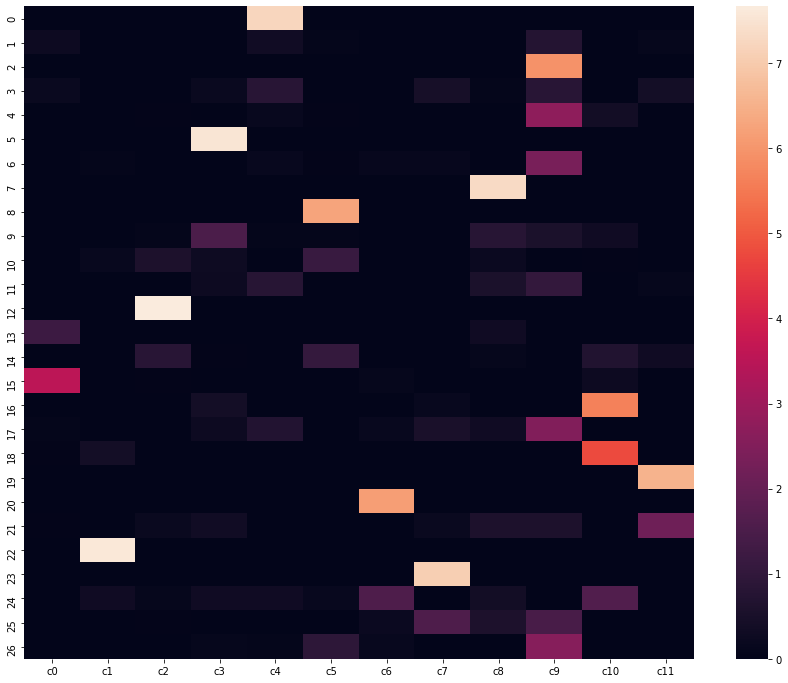

In [548]:
plt.figure(figsize = (15,12))
sns.heatmap(t_df)